#**HW1-Clustering**


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id="1vaDWspyv3WZrcvdvDyNLSYVuErX3m9Zc"


##**Business objective**
The business objective connected to the provided data on various attributes related to housing (longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, ocean proximity) could be to identify optimal housing development zones. This involves using clustering techniques like k-means to group geographical areas with similar housing attributes. By doing so, urban planners, real estate developers, and government agencies can make informed decisions about where to invest in housing development, infrastructure, and services. <br>




In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans



In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('housing.csv')
data=pd.read_csv("housing.csv")
data.shape
data.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Data Wrangling**
### Find what the data is saying? <br>
the data represents various attributes related to housing in different geographical areas. Longitude and latitude provide the spatial information of the locations. Housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity offer insights into the characteristics of housing in those areas. This data can potentially reveal patterns, trends, and relationships among these attributes, helping to understand the housing landscape of the region. <br>

### What story is the data telling us? <br>
Analyzing the data through clustering techniques might reveal clusters of geographical areas with similar housing attributes. For instance, it could show areas with higher median incomes and higher median house values clustered together, indicating affluent neighborhoods. It might also show areas with a higher population density, suggesting urban centers. These clusters and patterns can help create a narrative about the distribution of housing types, socioeconomic characteristics, and development levels across the region. <br>


In [ ]:
data.shape

(20640, 10)

data.info() provides a concise summary including the total non-null entries and data types for each column, along with the DataFrame's memory usage.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


display first 15 items in the dataset

In [ ]:
data.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


check if there is any duplicated items in the data

In [ ]:
data.duplicated().any()

False

The heatmap displays the correlation coefficients between every pair of variables (or columns) in the housing data. A correlation coefficient measures the linear relationship between two variables. Its values range from -1 to 1. <br>

A coefficient close to 1 implies a strong positive correlation: as one variable increases, the other also tends to increase.
A coefficient close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
A coefficient close to 0 implies little to no linear correlation between variables.

<ipython-input-11-33dfb9f38725>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


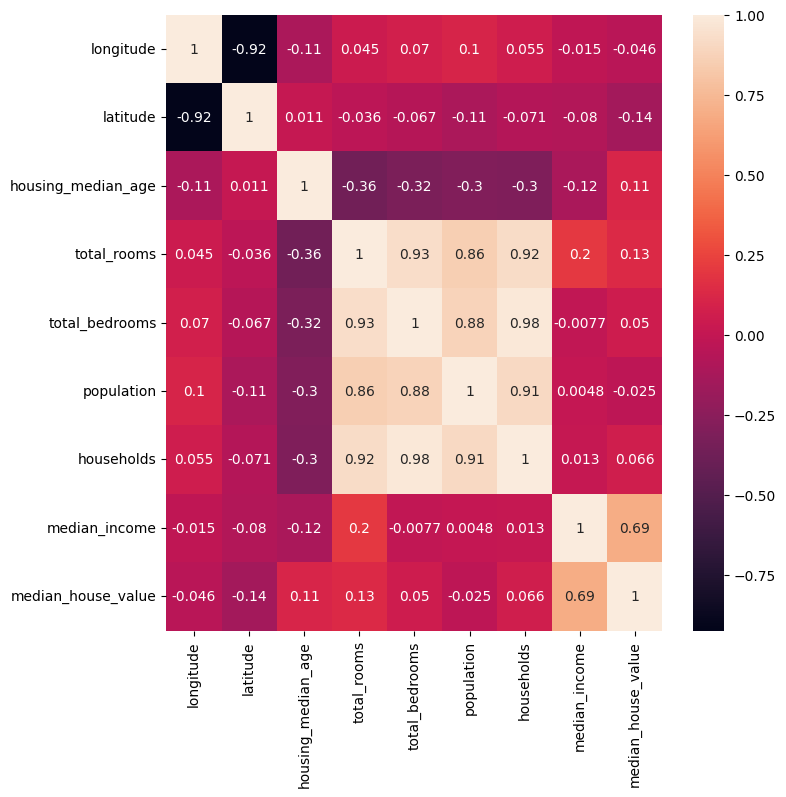

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In the below histogram plot displays the frequency or count of data points falling into specific intervals or bins.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

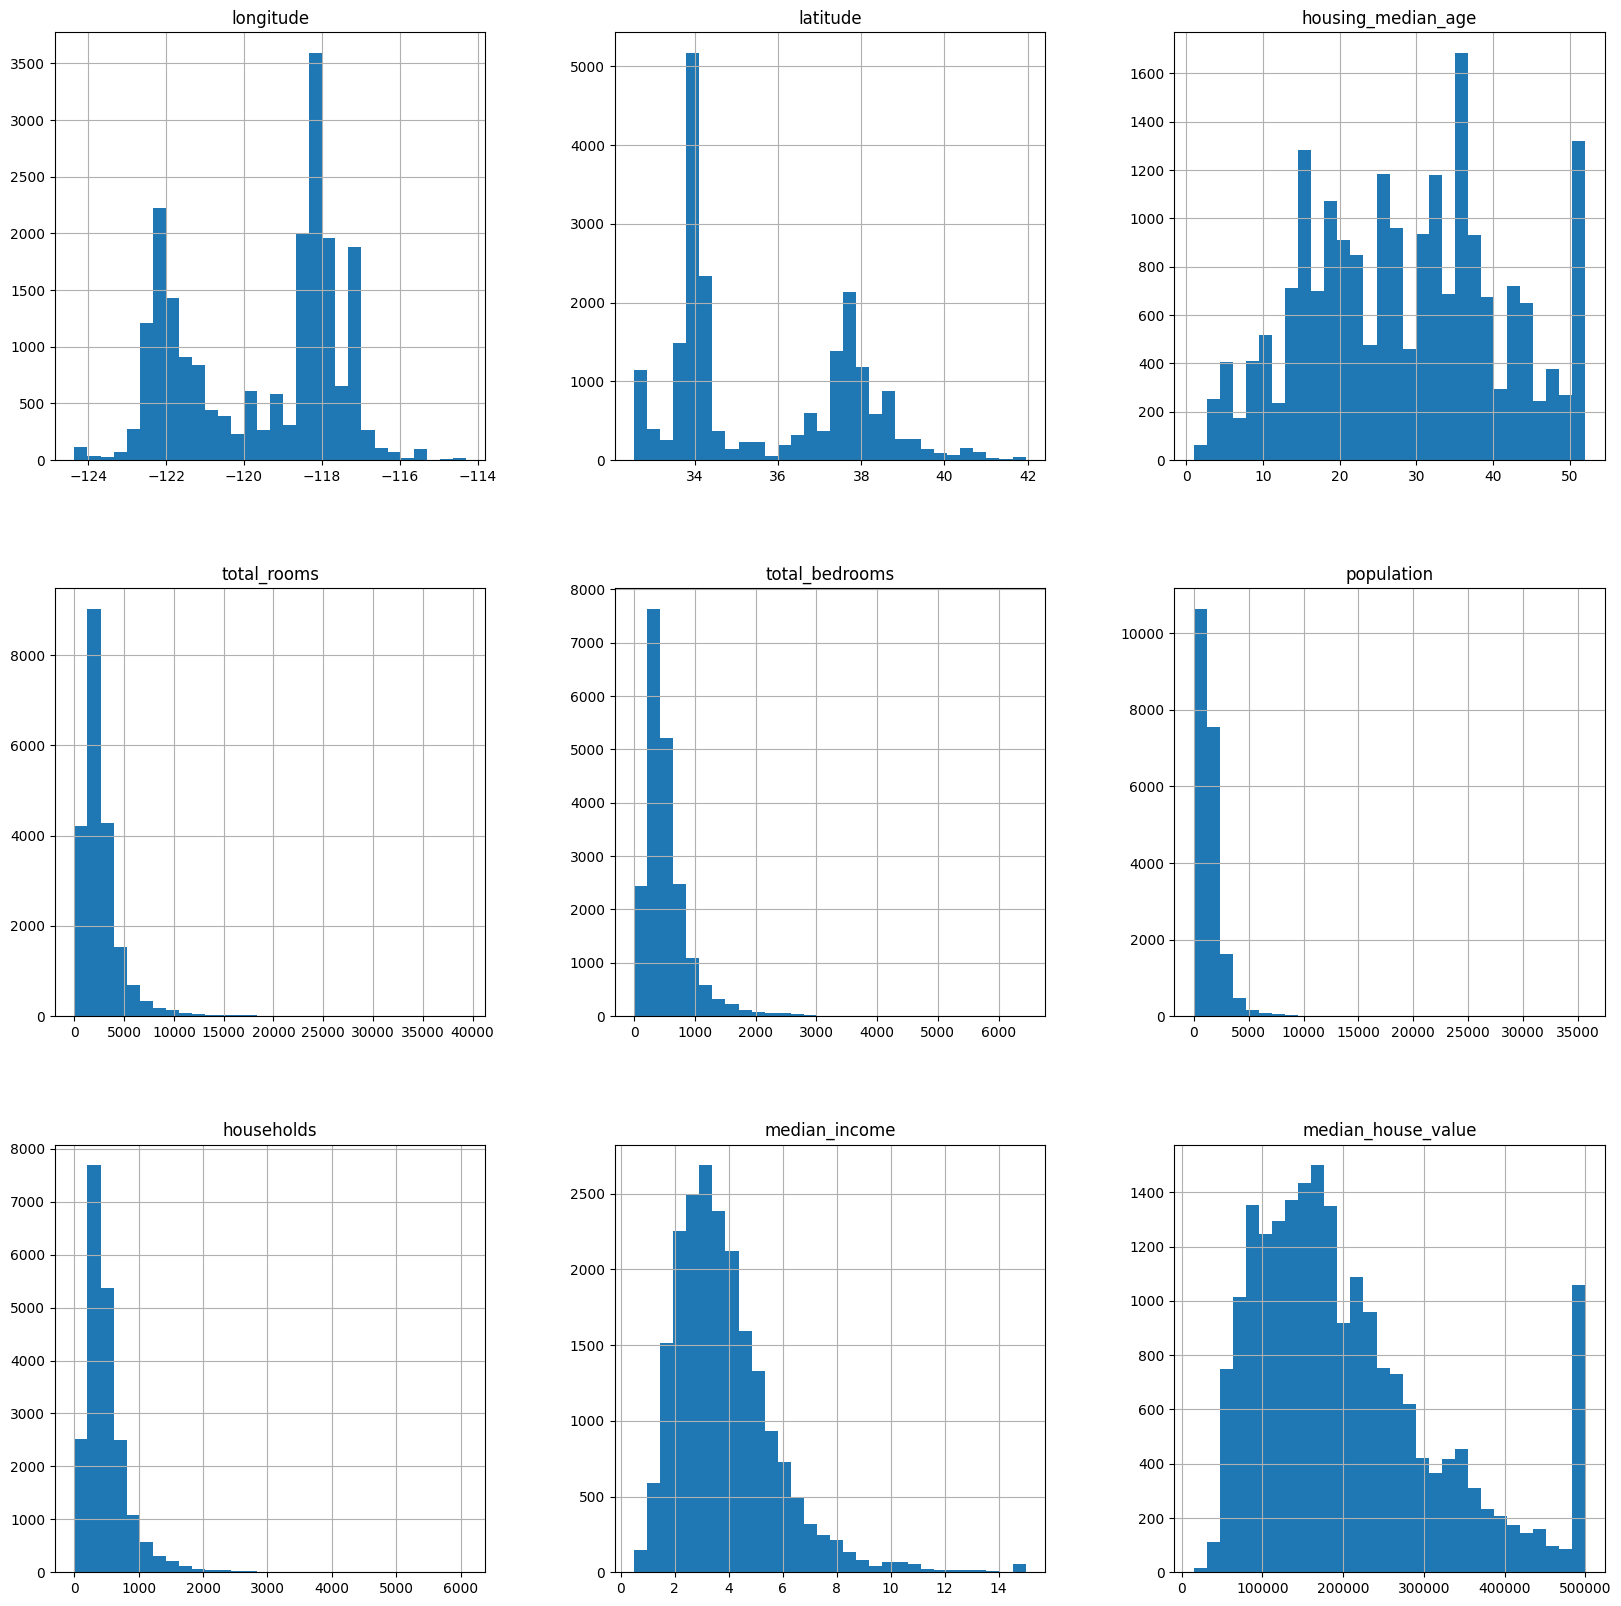

In [ ]:
data.hist(bins=30,figsize=[20,20])

choosing only below mentioned data from the dataset for the analysis and describing the data

In [ ]:
data =data[['total_rooms','population', 'households', 'median_income', 'median_house_value']]
data.describe()

,total_rooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2635.763081,1425.476744,499.539680,3.870671,206855.816909
std,2181.615252,1132.462122,382.329753,1.899822,115395.615874
min,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,1447.750000,787.000000,280.000000,2.563400,119600.000000
50%,2127.000000,1166.000000,409.000000,3.534800,179700.000000
75%,3148.000000,1725.000000,605.000000,4.743250,264725.000000
max,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


dropping null values

In [ ]:
df=data.dropna()

The code standardizes the data in the DataFrame df using StandardScaler, generates summary statistics using describe(), and stores them in the DataFrame data_s

In [ ]:

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1,2,3,4
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.201573e-17,-1.101617e-17,6.885104e-17,6.609700e-17,-9.363741e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.207283e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00
25%,-5.445698e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01
50%,-2.332104e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01
75%,2.348028e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01
max,1.681558e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=2,n_init=10,random_state=None,tol=0.001,verbose=0)


KMeans(algorithm='auto', n_clusters=2, n_init=10, tol=0.001)

In [ ]:
kmeans.inertia_

72212.67828512625

## Find the optimal number of cluster using Elbow method

    Cluster            SSE
0         1  103200.000000
1         2   72212.600773
2         3   51161.779136
3         4   41022.871791
4         5   35607.226833
5         6   30796.186364
6         7   27964.478275
7         8   25828.214122
8         9   23995.673534
9        10   22475.903346
10       11   21172.108505
11       12   19949.044659
12       13   19008.443729
13       14   18198.909304
14       15   17485.476222
15       16   16781.888451
16       17   16285.841971
17       18   15627.668195
18       19   15193.185200


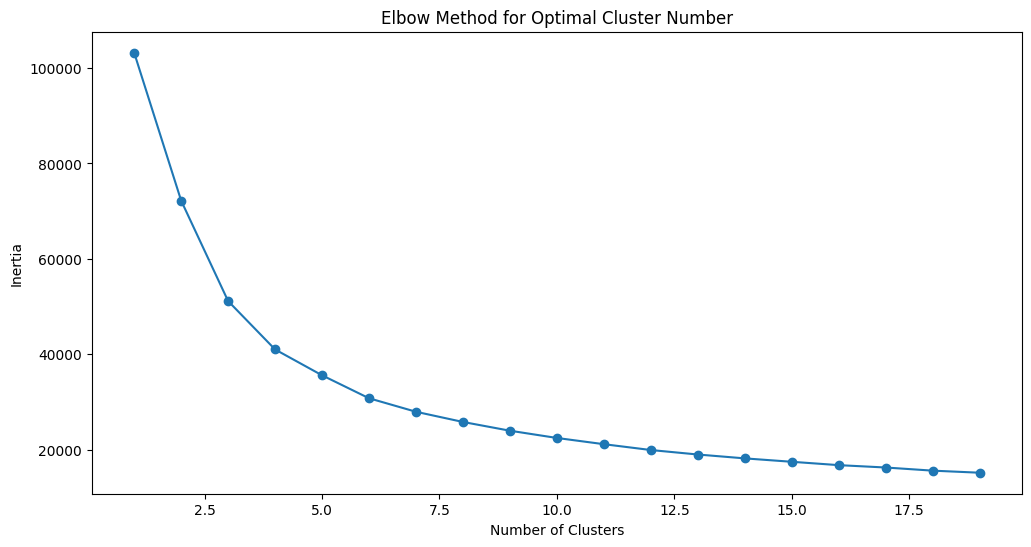

In [ ]:
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)


frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
print(frame)
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

Looking at the elbow curve we can choose any number between 4 to 8, Lets select the cluster as 4

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)



In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred

##**KMeans Using Scikitlearn**

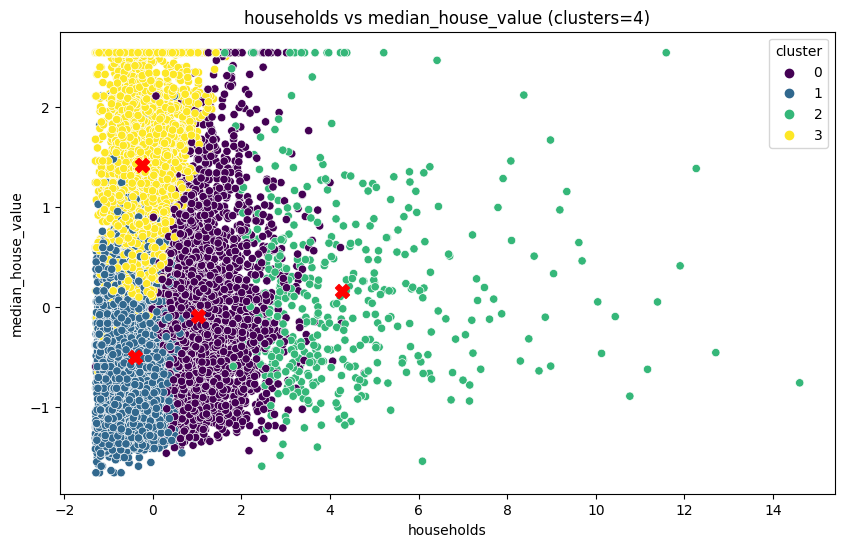

In [ ]:
centroids = kmeans.cluster_centers_

# Plotting the scatter plot with data points and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=frame[2], y=frame[4], hue=frame['cluster'], palette="viridis")
plt.scatter(centroids[:, 2], centroids[:, 4], c='red', marker='X', s=100)
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.title('households vs median_house_value (clusters=4)')
plt.show()

##**KMeans Using Tensorflow**

In [44]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.3 MB/s eta 0:00:00


In [45]:
import tensorflow as tf


In [46]:
data_scaled = tf.keras.utils.normalize(df.values, axis=0)

In [47]:
def kmeans(X, num_clusters=4, max_iters=100):
    # Step 1: Initialization
    idxs = np.random.choice(len(X), size=num_clusters, replace=False)
    centroids = tf.Variable(X[idxs])

    for _ in range(max_iters):
        # Step 2: Assignment
        # Calculate pairwise distances between data and centroids
        distances = tf.reduce_sum(tf.square(X[:, tf.newaxis] - centroids), axis=-1)
        # Assign each data point to the nearest centroid
        assignments = tf.argmin(distances, axis=-1).numpy()

        # Step 3: Update centroids
        new_centroids = []
        for j in range(num_clusters):
            cluster_data = X[assignments == j]
            new_centroid = tf.reduce_mean(cluster_data, axis=0)
            new_centroids.append(new_centroid)

        # Update centroids for the next iteration
        centroids.assign(new_centroids)

    return assignments

assignments = kmeans(data_scaled, num_clusters=4)







In [48]:
# Create a DataFrame to plot the results
frame = pd.DataFrame(data_scaled)
frame['cluster'] = assignments

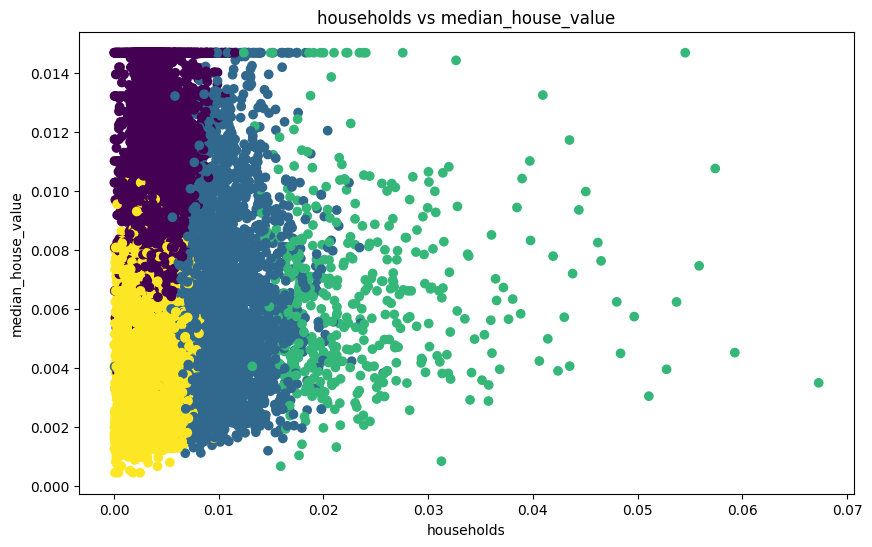

In [49]:
# 3. households vs median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(frame[2], frame[4], c=frame['cluster'], cmap='viridis')
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.title('households vs median_house_value')
plt.show()


## **Implementation using Aglomative clustering using scikitlearn**


In [42]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering



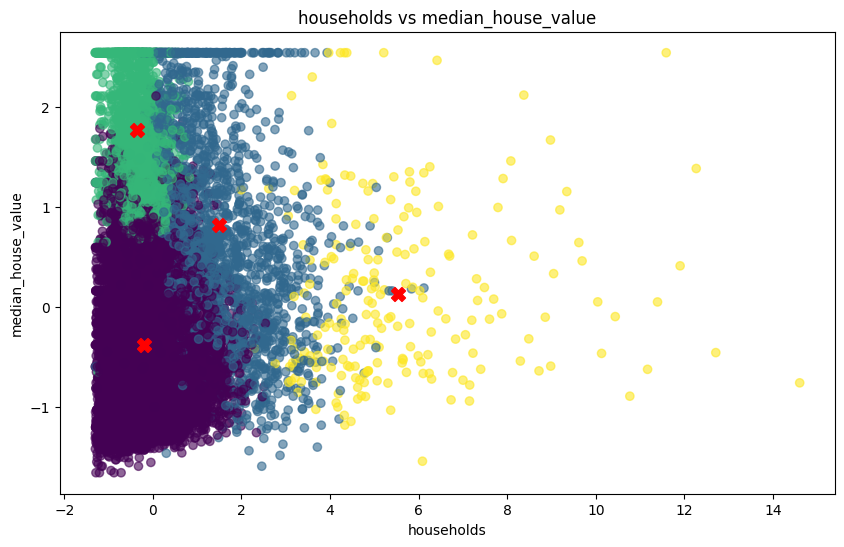

In [43]:
data_scaled = StandardScaler().fit_transform(df)

# Perform Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
assignments = agglomerative_clustering.fit_predict(data_scaled)

# Create a DataFrame to plot the results
frame = pd.DataFrame(data_scaled)
frame['cluster'] = assignments

centroids = frame.groupby('cluster').mean().reset_index()


# Plot the scatter plots
# 1. population vs households
plt.figure(figsize=(10, 6))
plt.scatter(frame[2], frame[4], c=frame['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids[2], centroids[4], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.title('households vs median_house_value')
plt.show()

## Observation

* The observation of clusters exhibiting "less median house value, lower number of household potentially points to regions that are less developed or possibly rural areas.
* In these regions, the property values might be lower due to a variety of factors including fewer amenities, lower demand, and possibly a lack of robust economic activities. Moreover, a smaller population in these areas might imply a quieter, more relaxed lifestyle compared to bustling urban centers

## **Reference**
https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering <br>
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb